BH Mass:  0.0422370918095 e10


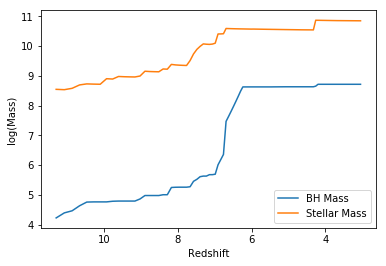

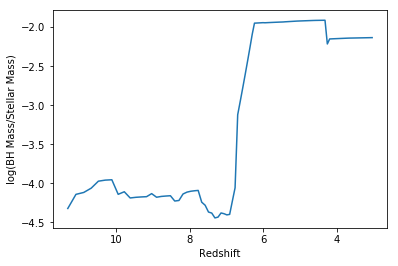

/Applications/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in log10


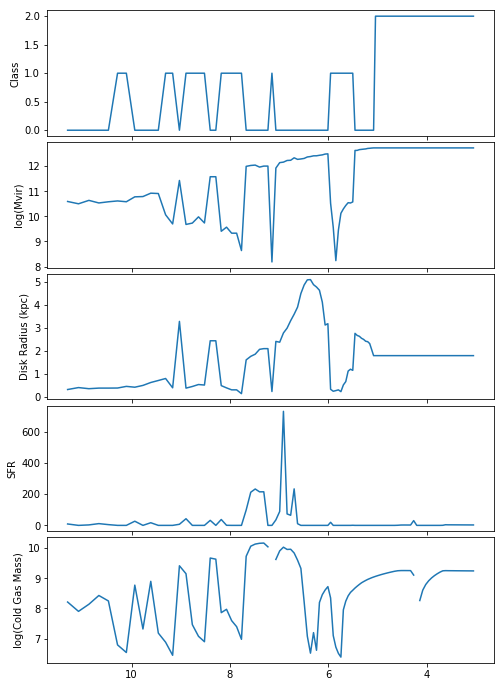

Sum of stars formed 3.258e+10
Final stellar mass 6.841e+10
Sum of stars formed as a central 2.598e+10
Sum of stars formed as a central or type 2 3.105e+10


TypeError: not enough arguments for format string

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##Load and store the data for the most massive BH in the data files
#Load data
fname='/Users/Maddie/GoogleDrive/PhD/Simulations/90016870715/BlackHoleMass.bin'
BHmass=np.fromfile(fname,dtype=float,count=-1,sep="")
BHproperties=np.zeros((15,len(BHmass)))
#Import the properties of this BH/host into a 1D array called BHproperties
addcolumns=['ID','Type','CentralGal','ColdGas','HotGas','StellarMass','DiskScaleLength','Sfr','Rvir','Mvir','Vvir']
BHproperties[0,:]=BHmass
i=1
for name in addcolumns: 
    fname='/Users/Maddie/GoogleDrive/PhD/Simulations/90016870715/'+name+'.bin'
    col=np.fromfile(fname,dtype=float,count=-1,sep="")
    BHproperties[i,:]=col
    i=i+1
#fname='/Users/Maddie/Downloads/90016870715/Pos.bin'
#col=np.fromfile(fname,dtype=float,count=-1,sep="")
#print(col)
#BHproperties[-3,:]=col[1]
#BHproperties[-2,:]=col[2]
#BHproperties[-1,:]=col[3]
columns=['BHmass','ID','Type','CentralGal','ColdGas','HotGas','StellarMass','DiskScaleLength','Sfr','Rvir','Mvir','Vvir','XPos','YPos','ZPos']

fname='/Users/Maddie/GoogleDrive/PhD/Simulations/90016870715/a_list.txt'
scalefactor=np.fromfile(fname,dtype=float,count=-1,sep="\n")
redshift=1/scalefactor-1

print('BH Mass: ',BHproperties[0,81],'e10')

plt.plot(redshift[30:-30],np.log10(BHproperties[0,30:-30]*1e10))
plt.plot(redshift[30:-30],np.log10(BHproperties[6,30:-30]*1e10))
plt.xlabel('Redshift')
plt.ylabel('log(Mass)')
plt.gca().invert_xaxis()
plt.legend(['BH Mass','Stellar Mass'],loc=4)
plt.show()

plt.plot(redshift[30:-30],np.log10(BHproperties[0,30:-30]/BHproperties[6,30:-30]))
plt.xlabel('Redshift')
plt.gca().invert_xaxis()
plt.ylabel('log(BH Mass/Stellar Mass)')
plt.show()

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True,figsize=(8,12))
ax1.plot(redshift[30:-30],BHproperties[2,30:-30])
#ax1.set_xlabel('Redshift')
ax1.invert_xaxis()
ax1.set_ylabel('Class')

ax2.plot(redshift[30:-30],np.log10(BHproperties[-5,30:-30]*1e10))
#ax2.set_xlabel('Redshift')
ax2.invert_xaxis()
ax2.set_ylabel('log(Mvir)')

ax3.plot(redshift[30:-30],BHproperties[7,30:-30]*3000)
#ax3.set_xlabel('Redshift')
ax3.invert_xaxis()
ax3.set_ylabel('Disk Radius (kpc)')

ax4.plot(redshift[30:-30],BHproperties[8,30:-30])
#ax4.set_xlabel('Redshift')
ax4.invert_xaxis()
ax4.set_ylabel('SFR')
ax4.set_xlim(ax4.get_xlim()[::-1])

ax5.plot(redshift[30:-30],np.log10(BHproperties[4,30:-30]*1e10))
#ax5.set_xlabel('Redshift')
ax5.invert_xaxis()
ax5.set_ylabel('log(Cold Gas Mass)')
ax5.set_xlim(ax4.get_xlim()[::-1])

#ax6.plot(redshift[30:-30],BHproperties[-2,30:-30])
#ax6.set_xlabel('Redshift')
#ax6.invert_xaxis()
#ax6.set_ylabel('Z position')
#ax6.set_xlim(ax4.get_xlim()[::-1])

f.subplots_adjust(hspace=0.05)
plt.show()

#fig, ax1 = plt.subplots()
#ax1.plot(redshift[25:-20],BHproperties[8,25:-20])
#ax1.invert_xaxis()
#ax1.set_xlabel('Redshift')
#ax1.set_ylabel('SFR')

#ax2 = ax1.twinx()
#ax2.plot(redshift[25:-20],BHproperties[7,25:-20]*3000,'k--')
#ax2.set_ylabel('Disk Radius (kpc)')

#ax3=ax1.twinx()
#ax3.spines['right'].set_position(('axes', 1.15))
#ax3.plot(redshift[25:-20],BHproperties[2,25:-20],'k')
#ax3.set_ylabel('Class')
#plt.show()


fname='/Users/Maddie/GoogleDrive/PhD/Simulations/90016870715/dt.bin'
dt=np.fromfile(fname,dtype=float,count=-1,sep="")
SF=BHproperties[8,:]*dt*1e6
print("Sum of stars formed %.4g"%sum(SF))
print("Final stellar mass %.4g"%(BHproperties[6,-1]*1e10))
centralSF=[SF[i] for i in range(0,len(dt))if BHproperties[2,i]==0]
type2SF=[SF[i] for i in range(0,len(dt))if BHproperties[2,i]==2]
print("Sum of stars formed as a central %.4g"%sum(centralSF))
print("Sum of stars formed as a central or type 2 %.4g"%sum(centralSF+type2SF))
print("Sum of stars formed as a type 1: %.4g or %.4g percent"%(sum(SF)-sum(centralSF+type2SF))%((sum(SF)-sum(centralSF+type2SF))/sum(SF)))

plt.plot(redshift,np.log10(SF))
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(redshift[20:],BHproperties[2,20:])
ax1.invert_xaxis()
ax1.set_xlabel('Redshift')
ax1.set_ylabel('SFR')

#ax2 = ax1.twinx()
#ax2.plot(redshift[20:],BHproperties[8,20:],'k--')
#ax2.set_ylabel('SFR')

ax3 = ax1.twinx()
ax3.plot(redshift[20:],np.log10(SF[20:]),'ro')
ax3.set_ylabel('SF')
plt.show()

In [149]:
import numpy as np
import matplotlib.pyplot as plt

fname='/Users/Maddie/Downloads/90016870715/a_list.txt'
scalefactor=np.fromfile(fname,dtype=float,count=-1,sep="\n")
redshift=1/scalefactor-1

In [33]:
a=[1,2,3,4,5,6,7,8,9]
b=[0,0,0,1,1,0,1,0,1]
c=[a[i] for i in range(0,len(a)) if b[i]==0]
print(c)

[1, 2, 3, 6, 8]
